# ELEC 400M / EECE 571M Assignment 3: Clustering
(Again, this assignment drew inspiration from an assignment used in ECE 421 at the University of Toronto and kindly made available to us by the instructor; as well as from the problem set in our textbook Learning from Data.)

In this assignment, you will implement and test methods for clustering that we have discussed in the course.

## Data Sets

You will be working with two data sets:
- data2D.npy
- data100D.npy

Each of the data sets has 10,000 data points, which are 2-dimensional and 100-dimensional, respectively.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


## K-Means algorithm [18 marks]

You will first implement and test the K-means algorithm. 

### Implement the functions [5 marks]

For this, you will only use functions from the NumPy library. You will implement four functions to realize the K-Means algorithm.

- `distanceFunc`: This function accepts your data and cluster centers and returns the squared pairwise distances between data points and cluster centers. 
- `KMinit`: This function accepts your data and returns the initial cluster centres. You will use the "greedy approach" described on page 6-16 in the textbook, but instead of a randomly selected data point always pick the first entry in the data set as the first center. 
- `lossFunc`: This function accepts the squared pairwise distances between data points and cluster centers and returns the sum of cluster errors as defined in (6.5) in the textbook. 
- `KMmeans`: This function implements the K-Means algorithm as described in the textbook. It returns the cluster centers and the sum of cluster errors as defined in (6.5) in the textbook. 

In [2]:
def distanceFunc(x, mu):
    # Inputs  
    # x: is an NxD data matrix (N observations and D dimensions)
    # mu: is an KxD cluster center matrix (K cluster centers and D dimensions)
    # Output
    # pair_dist2: is the NxK matrix of squared pairwise distances
    
    pair_dist2 = np.zeros([x.shape[0], mu.shape[0]])
    #Iterate through centers to sum up squared distances between each point and each center
    for i in range(mu.shape[0]):
            pair_dist2[:,i] = np.sum(np.square(x - mu[i,:]), axis = 1)
    return pair_dist2

In [3]:
def KMinit(x, K):
    # Inputs
    # x: is an NxD data matrix 
    # K: number of clusters
    # Output
    # mu: is the KxD matrix of initial cluster centers using the "greedy approach" described on page 6-16 in the textbook. 
    # Remark: Always pick the first entry in the data set as the first center. 
    
    #Initialize KxD matrix of cluster centers
    mu = np.zeros([K, x.shape[1]])
    
    #set first center as the first data entry
    mu = np.array([x[0, :]]);
    
    #delete first entry from x to prevent duplicate center
    x = np.delete(x, 0, 0)
    
    #iterate (K - 1) times to find the rest of the initial centers
    for i in range(1,K):
        #get distance matrix
        dist = distanceFunc(x, mu)    
        #sum the distances from each point to all centers (N x 1)
        distsum = np.sum(dist, axis = 1)
        #get indext of furthest point from all centers
        maxIdx = np.argmax(distsum)
        #append the furthest point to mu[]
        mu = np.vstack([mu, x[maxIdx,:]])
        #delete the value of x used as an initial center
        x = np.delete(x, maxIdx, 0)
    return mu

In [4]:
def lossFunc(pair_dist2):
    #Input
    #pair_dist2: is the NxK matrix of squared pairwise distances
    #Output
    #loss: the sum of the distance of each data point to the nearest center
    
    #centerDist is a vector containing the smallest value in each row of pair_dist2 (distances to each center); 
    #  This is a vector of the distance to each datapoint's closest center
    centerDist = pair_dist2.min(1)
    #summate and return the distances from each datapoint to it's closes center
    loss = np.sum(centerDist)
    return loss


In [5]:
def Kmeans(x,K):
    # Inputs
    # x: is an NxD data matrix 
    # K: number of clusters
    # Outputs
    # mu: is the KxD of cluster centers  
    # loss: error as defined in (6.5) in the textbook 
    
    #initialize centers
    mu = KMinit(x,K)
    

    #get distances from each point to each center
    dist = distanceFunc(x, mu) 
    
    #get the initial loss function and use this to initiate oldEin (previous loss value) as well
    Ein = lossFunc(dist)
    oldEin = Ein
    
    #flag for determining the end of the loop
    finished = False
    
    #Run K-Means until no change in in-sample error
    while(not finished):
        
        #find closest center for each entry
        centerIdx = np.argmin(dist, axis = 1) 
        
        #iterate through cluster centers
        for i in range(K):
            
            #iterate through data and append all points closest to current cluster center to a list. 
            group = [];
            for j in range(x.shape[0]):
                
                #append all entries closest to center K to list
                if centerIdx[j] == i: 
                    group.append(x[j, :])
                    
            #get average of entries closes to K and set as new center K
            group = np.array(group)
            mu[i,:] = np.divide(np.sum(group, axis = 0), group.shape[0])
        
        #calculate curent in-sample error
        dist = distanceFunc(x, mu)
        Ein = lossFunc(dist)
        
        #raise flag when in-sample error no longer changes
        if(oldEin == Ein): 
            finished = True    
        oldEin = Ein

    return mu, Ein
    

### Test the functions [5 marks]

Develop toy-sized test cases (create your own very small data set(s)) for all four functions and verify the correct operation. 

Use the code cell below to program the test cases and to print and/or plot the results as appropriate. 

Use the text cell below to describe your test cases and comment on the results.

Test distanceFunc()...
	2D test passed OK
	3D test passed OK
Test KMinit()...
	K = 3 2D test passed OK
	K = 5 2D test passed OK
	K = 8 3D test passed OK
Test lossFunc(), test #1/2...
	test passed OK
Test lossFunc(), test #2/2...
	test passed OK
Test Kmeans()
	Center offsets:  [0.02850019 0.02539951 0.04518942 0.05798041 0.08330665]
	test passed OK


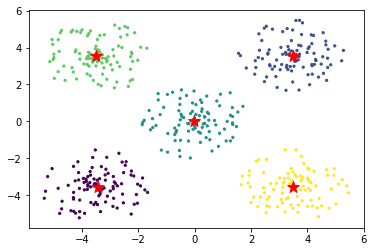

In [6]:
#Scatter plot 2D grouped data with centers
def plotGrouped2D(data, centers):
    #Inputs: 
    # data: data matrix with dimensions Nx2
    # centers: group center matrix with dimensions Kx2
    pair_dist2 = distanceFunc(data, centers)
    iGroup = np.argmin(pair_dist2, axis = 1)
    plt.figure()
    plt.scatter(data[:,0], data[:,1], c = iGroup, s=5)
    plt.scatter(centers[:,0], centers[:, 1], c = 'red', s=150, marker = '*')

#test distance func -------------------------------------------------------

###2D
print("Test distanceFunc()...")

#manually created and hand-validated test data. 
x = np.array([[1,1], [3,3], [5,5], [7,7], [9,9], [1,9], [2,9], [9,1], [9,2]])
mu = np.array([[2,2], [6,6], [3,7], [7,3]])
dist_expected = np.array([[2, 50, 40, 40], [2, 18, 16, 16], [18, 2, 8, 8], \
    [50, 2, 16, 16], [98, 18, 40, 40], [50, 34, 8, 72], [49, 25, 5, 61], [50, 34, 72, 8], [49, 25, 61, 5]])
dist = distanceFunc(x, mu)
try: 
    if(np.array_equal(dist, dist_expected)):
        print("\t2D test passed OK")
    else: 
        print("\t2D test failed")
except ValueError:
    print("\ttest failed: Value Error")
    
###3D    
#manually created and hand-validated test data. 
x = np.array([[2,2,2],[5,5,5],[10,10,10],[-5, -5,-5]])
mu = np.array([[0,0,0], [1,1,1]])
dist_expected = np.array([[12,3], [75,48], [300,243], [75,108]])
dist = distanceFunc(x, mu)
try: 
    if(np.array_equal(dist, dist_expected)):
        print("\t3D test passed OK")
    else: 
        print("\t3D test failed")
except ValueError:
    print("\ttest failed: Value Error")
    
    
#test KMinit --------------------------------------------------------------
###2D
print("Test KMinit()...")

#manually created and hand-validated test data. 
x = np.array([[1,1], [3,3], [5,5], [7,7], [9,9], [1,9], [5,9], [9,1], [5,1], \
    [6,2], [7,4]])
mu_expected = np.array([[1,1], [9,9], [1,9]])

mu = KMinit(x, 3)
try: 
    if(np.array_equal(mu, mu_expected)):
        print("\tK = 3 2D test passed OK")
    else: 
        print("\tK = 3 2D test failed")
except ValueError:
    print("\ttest failed: Value Error")   
#manually created and hand-valudated test data. 
x = np.array([[1,1], [3,3], [5,5], [7,7], [9,9], [1,9], [5,9], [9,1], [5,1], \
    [6,2], [7,4]])
mu_expected = np.array([[1,1], [9,9], [1,9], [9,1], [5,9]])

mu = KMinit(x, 5)
try: 
    if(np.array_equal(mu, mu_expected)):
        print("\tK = 5 2D test passed OK")
    else: 
        print("\tK = 5 2D test failed")
except ValueError:
    print("\tK = 5 test failed: Value Error")   
    
###3D   

#manually created and hand-validated test data. 
x = np.array([[5,5,5],[0,0,0],[-5,-5,-5],[0,1,1],[4.9,4.9,-4.9],[3,3,3],[4.8,-4.8,4.8],[2,3,4],[-4.7,4.8,4.8], \
              [1,2,3],[4.7,-4.6,-4.6],[4,-4,-4],[-4.5,-4.5,4.6],[4.4,-4.4,4.4],[-4.5,4.5,-4.5],[3,-3,3]])
mu_expected = np.array([[5,5,5],[-5,-5,-5],[4.9,4.9,-4.9],[-4.5,-4.5,4.6],[4.8,-4.8,4.8], \
                        [-4.5,4.5,-4.5],[-4.7,4.8,4.8],[4.7,-4.6,-4.6]])

mu = KMinit(x, 8)
try: 
    if(np.array_equal(mu, mu_expected)):
        print("\tK = 8 3D test passed OK")
    else: 
        print("\tK = 8 3D test failed")
except ValueError:
    print("\tK = 5 test failed: Value Error")   
    
#test lossFunc ------------------------------------------------------------
print("Test lossFunc(), test #1/2...")

#manually created and hand-validated test data. 
pair_dist2 = np.array([[1,2,3],[3,12,4],[3,9,18]])
expected_result = 7
try: 
    if(lossFunc(pair_dist2) == expected_result):
        print("\ttest passed OK")
    else: 
        print("\ttest failed")
except ValueError:
    print("\ttest failed: Value Error")   
      
print("Test lossFunc(), test #2/2...")
#manually created and hand-validated test data. 
expected_result = 12
pair_dist2 = np.array([[1,2,1.01,3],[9,3,2,1],[5,4,9,3],[3,3.1,9,8],[4,5,6,7]])
try: 
    if(lossFunc(pair_dist2) == expected_result):
        print("\ttest passed OK")
    else: 
        print("\ttest failed")
except ValueError:
    print("\ttest failed: Value Error")   
    
    
    
#test Kmeans ----------------------------------------------------------------
print("Test Kmeans()")

#Generate 5 Random Groupes within R^2 from -5 < x1 < 5; -5 < x2 < 5
# - centers at [+-3.5, +-3.5] and at 0 with radius 1.5.
radius = 2
samples = 100
mu_gen = np.array([[0, 0],[3.5, 3.5],[3.5, -3.5],[-3.5, 3.5],[-3.5, -3.5]])
x1 = []
x2 = []
#generate random samples within a circle of radius 2 around each center in mu_gen and shuffle data
theta = np.linspace(0, 2*np.pi, samples)
for i in range(5): 
    r = radius*np.random.rand((samples))
    x1.extend(np.array(np.add(r * np.cos(theta), mu_gen[i][0])))
    x2.extend(np.array(np.add(r * np.sin(theta), mu_gen[i][1])))
data = np.transpose(np.vstack((np.array(x1), np.array(x2))))
data = np.vstack((data, mu_gen))
np.random.shuffle(data)

#run K-Means
mu, Ein = Kmeans(data, 5)

#plot the data
plotGrouped2D(data, mu)

#calculate the average center of each cluster and the length error from the proposed center to the norm center
centerIdx = np.argmin(distanceFunc(data, mu_gen), axis = 1) 
center_average = np.array([(np.sum(data[np.where(centerIdx==i)], axis=0)/len(data[np.where(centerIdx==i)])) for i in range(5)])
e_centers = np.linalg.norm(center_average-mu_gen, axis=1)
print("\tCenter offsets: ", e_centers)
try: 
    if(np.sum(e_centers < 0.1) == 5):
        print("\ttest passed OK")
    else: 
        print("\ttest failed")
except ValueError:
    print("\ttest failed: Value Error") 

Test Case Descriptions
===


distanceFunc(x, mu): 
---

This function simply returns the squared pairwise distances between data points and cluster centers. This was tested in 2D and 3D. A 9x2 dataset was created along with a 4x2 center dataset for 2D. A 4x3 dataset was created with a 2x3 center (K=2) dataset for 3D. The expected results were hand-calculated and entered into the notebook. The computed result is compared with the expected to produce pass/fail results. All tests pass. 


KMinit(x, K):
---

This function uses a greedy approach to find the cluster centers. To develop this in 2D, a simple 11x2 dataset was created. The points were manually mapped by hand on grid-paper to predict the results. 

For 3D, a 16x3 dataset was manually created. The initial point was placed in the corner of a 10x10x10 cube (-5 to 5 on each axis). Each corner has a point, which is the extreme where the center is expected. The corner point's distances from center descend slightly to enforce a distance order for testing. 8 Arbitrary points were abritrarily placed close to and far from the corners intended to be not found as centers. 

The computed result is compared with the expected to produce pass/fail results. This was tested for K = 3 and K = 5 for the 2D dataset and K = 8 for the 3D dataset. All tests pass. 

lossFunc(pair_dist2)
---

The loss function is defined as: 
$$
E_{in}(S_1,...,S_k;\mu_1,...,\mu_k) = \sum^k_{j-1}E_j = \sum^N_{n=1} || \mathbf{x_n} - \mathbf{\mu}(\mathbf{x_n}) ||^2
$$

The smallest value of of each row in pair_dist2 is the distance to the closest center. This function takes the smallest value of each pair_dist2 row and sums them to produce the total loss. 

This test has an arbitrary 4x3 input (3 centers) and 5x4 inputs (4 centers) and two hand calculated scalar results. The test compares the output of lossFunc to the prediction and outputs the pass/fail results. All tests pass. 

Kmeans(x,K)
---

The Kmeans() test creates 5 centers evenly spread out in a 12x12 grid (-6 to 6 on each axis). Data is generated randomly and evenly around each point. The data is plotted along with the predicted centers. In this case, visual confirmation can be used to empirically confirm a center is placed in the middle of each cluster as shown in the resulting figure below.
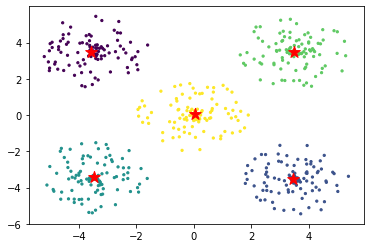

In addition, the mean of each cluster is calculated and compared against with the generated center. If this distance is below 0.1, the test passes. That is, the test passes when the approximated center is within 1% of the actual center. This threshold is chosen arbitrarily through experientation of iterating the random centered data and evaluating the maximum distance from the center mean to the intended center point. This test passes. 

### Run K-Means on 2D data set [4]

Implement a script that runs the K-Means algorithm (using the functions above) with $K = 1, 2, 3, 4, 5$ for the data set data2D.npy.  

The script should produce the following plots:
- for each of these values of $K$, a 2D scatter plot of the data points colored by their cluster assignments plus the cluster centers
- the K-means loss as a function of $K$

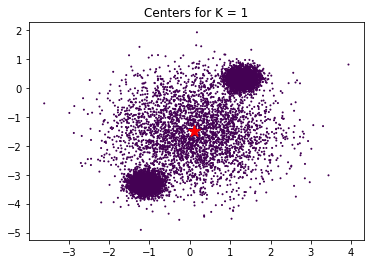

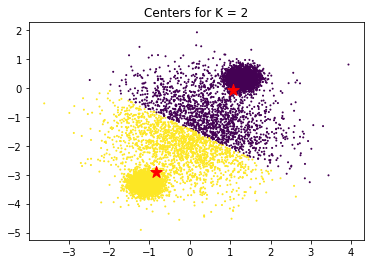

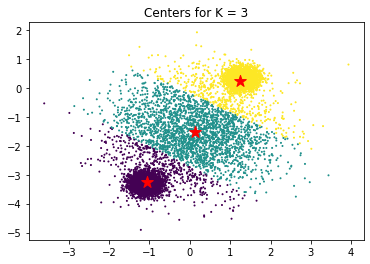

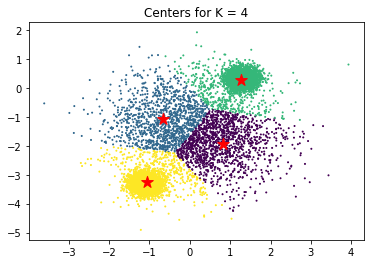

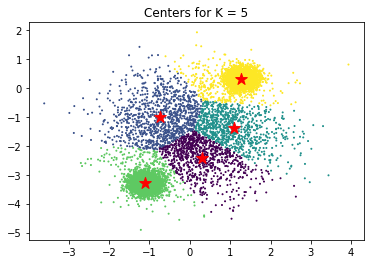

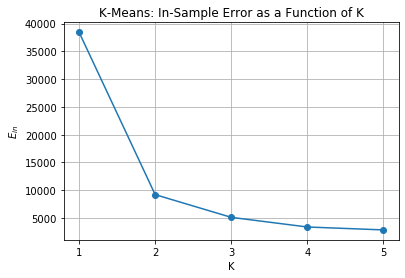

In [7]:
#Custom function for plotting grouped 2D data with a different color for each group, and the group centers
def plotGrouped2D(data, centers, title):
    #Inputs: 
    # data: data matrix with dimensions Nx2
    # centers: group center matrix with dimensions Kx2
    # title: (string) Title for each plot
    pair_dist2 = distanceFunc(data, centers)
    iGroup = np.argmin(pair_dist2, axis = 1)
    plt.figure()
    plt.scatter(data[:,0], data[:,1], c = iGroup, s=1)
    plt.scatter(centers[:,0], centers[:, 1], c = 'red', s=150, marker = '*')
    plt.title(title)
     
data2D = np.load('data2D.npy')

#Run K-Means for K=1 to K=5
K = np.arange(1,6)
kmeans = [Kmeans(data2D,k) for k in K]

#Convert K-Means data to numpy array and extract mu and Ein separately
kmeans = np.array(kmeans)    
mu = kmeans[:,0]
Ein = kmeans[:,1]

#Plot the five K-means groupings
plt.plot(K, [plotGrouped2D(data2D, mu[i], "Centers for K = {}".format(i+1)) for i in range(5)], '-o')

# Plot Ein vs K
x_labels = [1,2,3,4,5]
plt.figure()
plt.plot(x_labels, Ein, '-o')
plt.xticks(x_labels)
plt.xlabel('K')
plt.ylabel('$E_{in}$')
plt.title('K-Means: In-Sample Error as a Function of K')
plt.grid('on')

Discuss below on how many clusters you think is "best" and why? 

The K-means graph for the in-sample error vs K shows an elbow (distinctly lower slope magnitude change) at K=2. The in-sample error greatly improves betwen K=1 and K=2. The improvement between K=2 and K=3 is much less, and then barely improves beyond K=3. This sharp change after K=2 signifies that the ideal number of K-Means centers is 2 for this dataset.

However, it is somewhat difficult to discern between 2 and 3 centers due whatg appears to be a second soft elbow at k=3. This is an inherent problem using K-Means Ein to approximate K. In fact, the gmm gap statistic and BIC explored later both suggest K=3 is optimal. 

### Explore Gap statistics [4]

Implement a script which does the following (using the functions implemented above).
Generate benchmark random data of the same size as the 2D data set, uniformly over the smallest axis-aligned square containing the actual data. Run the K-Means algorithm on this random data for $K=1,2,3,4,5$. Repeat for 10 such random data sets to obtain the average K-Means error, $E_{in}^{rand}(K)$ as a function of $K$. Plot the average K-Means error and the "gap statistic" 
$$G(K)=\log \left[E_{in}^{rand}(K)\right]-\log \left[E_{in}(K)\right]$$
as functions of $K$, where $E_{in}(K)$ is the K-Means error for the data set data2D.npy obtained above.

Retain the initialization of the random generator as provided below.

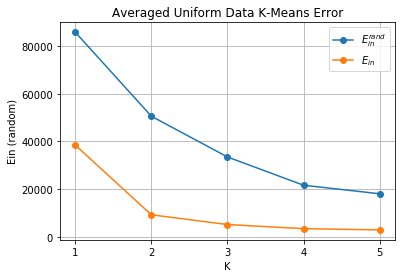

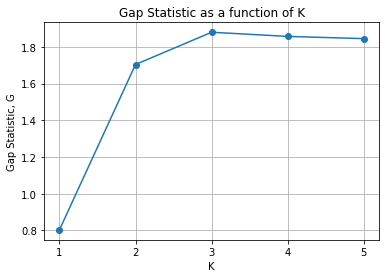

In [8]:
#custom function to obtain a grid of random points within given bounds
def getRand(size, x1_max, x1_min, x2_max, x2_min):
    #Inputs
    # size: size of dataset to generate
    # x1_max: maximum value of x1
    # x1_min: minimum value of x1
    # x2_max: maximum value of x2
    # x2_min: minimum value of x2
    #Output
    # x_rand: sizeX2 matrix of random points
    
    #Randomly enerate x1 value vector
    x_rand = np.random.rand(size,1)*(x1_max-x1_min) + x1_min
    
    #Randomly generate x2 values and append to x1 vector to make the x_rand matrix
    x_rand = np.hstack((x_rand, np.random.rand(size,1)*(x2_max-x2_min) + x2_min))
    
    return x_rand


np.random.seed(421)
data2D = np.load('data2D.npy')

#get maximum and minumum value for each axis in data2D
x1_max = np.max(data2D, axis = 0)[0]
x1_min = np.min(data2D, axis = 0)[0]
x2_max = np.max(data2D, axis = 0)[1]
x2_min = np.min(data2D, axis = 0)[1]

#declare and initialize gap-statistic result vector     
G = np.zeros(5)

#declare and initialize random data in-sample error result vector  
Ein_rand = np.zeros(5)

#Iterate through K=1 to K=5 to obtain the gap-statistic and random data in-sample K-Means error for each
for i in range(5):
    
    #Declare and initialize temporary gap-statistic and in-sample error accumulators
    G_temp = 0
    E_temp = 0
    
    #get in-sample error for dataset at current K value
    mu, Ein_ = Kmeans(data2D, i+1)
    
    #Obtain average K-means gap-statistic for 10 randomly generated centers and store in their respective result vectors
    for j in range(10):
        x = getRand(np.shape(data2D)[0], x1_min, x1_max, x2_min, x2_max)
        mu, Ein_r = Kmeans(x, i+1)      
        G_temp += np.log(Ein_r) - np.log(Ein_)
        E_temp += Ein_r
    G[i] = G_temp/10
    Ein_rand[i] = E_temp/10

#Print the aceraged uniform data K-means error (and the 2D data K-means error for comparison). 
x_labels = [1,2,3,4,5]
plt.figure()
plt.plot(x_labels, Ein_rand, '-o', label='$E_{in}^{rand}$')
plt.plot(x_labels, Ein, '-o', label='$E_{in}$')
plt.legend(loc='upper right')
plt.xticks(x_labels)
plt.title('Averaged Uniform Data K-Means Error')
plt.ylabel('Ein (random)')
plt.xlabel('K')
plt.grid('on')

#Print Gap-Statistic as a function of K
plt.figure()
plt.plot(x_labels, G, '-o')
plt.xticks(x_labels)
plt.ylabel('Gap Statistic, G')
plt.title('Gap Statistic as a function of K')
plt.xlabel('K')
plt.grid('on')

Briefly explain the "gap statistic" and discuss on how many clusters you think is "best" based on the gap statisic and on how this compares with your result from above.  

The gap-statistic measures the difference between the log of the in-sample error for training the clustered dataset used for training and the log of the in-sample error for random non-clustered data (uniformly spread data with the same boundaries as the training set). 

This is easier to explain as the log of the ratio of in-sample error for random data over the in-sample error for grouped data: 

$$G(K)=\log \Biggl ( \frac{ E_{in}^{rand}(K)}{E_{in}(K)} \Biggr )$$

At lower values of K, the log of the grouped data errors will be much lower than that of the ungrouped data. As K approaches the optimal K this difference should increase. Beyond the optimal K, the ratio of errors between the grouped and non-grouped data will tighten will likely be larger than the number of proper groups in the dataset. 

The random data will begin to group with less error as K increases. This can be seen in the "Averaged Uniform Data K-Means Error" plot. The K value for which the ratio is largest (G is maximum) is the optimal K value accorging to the gap-statistic model. 

In this case, the gap statistic shows that K=3 is optimal. 

## Soft-clustering with the Mixture of Gaussians [7 marks]

Now you will implement and test soft-clustering using density estimation with Gaussian mixture models. For this you will use the functions from the scikit-learn library.

First, write a script that, for the 2D data set data2D.npy,
- estimates the parameters of the Gaussian mixture models with $K=3$ components,
- plots the contours of the density,
- plots the decision boundaries for clustering. 

In the markdown cell below, interpret what you see in the plot and compare with the plot for $K=3$ clusters for the K-Means algorithm above. 

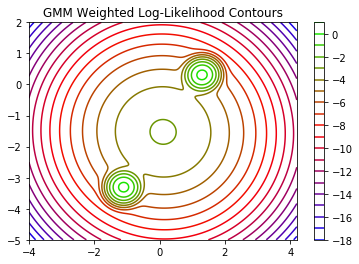

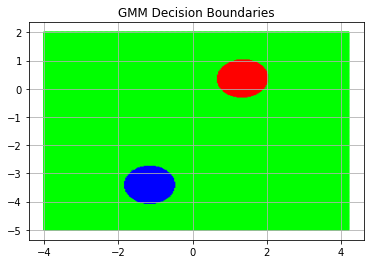

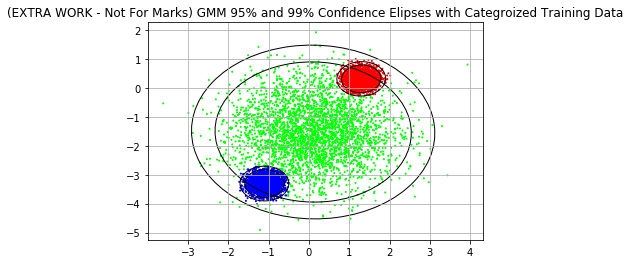

In [9]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib as mpl

data2D = np.load('data2D.npy')
gmm = GMM(n_components=3).fit(data2D)
# gmm.fit(data2D)

                #---Contour Plot---#
    
# display predicted scores by the model as a contour plot
x = np.linspace(-4., 4.2, 250)
y = np.linspace(-5., 2., 250)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape(X.shape)
plt.figure()
plt.contour(X,Y,Z, 20, cmap = 'brg')
plt.colorbar(); 
# plt.scatter(data2D[:,0], data2D[:,1], c = gmm.predict(data2D), s=5)
plt.title('GMM Weighted Log-Likelihood Contours')
plt.axis('tight')

                #---Decision Boundary Plot---#
plt.figure()    
Z = np.array([X.ravel(), Y.ravel()]).T
plt.scatter(Z[:,0], Z[:,1], c = gmm.predict(Z), s=1, cmap = 'brg')   
plt.title('GMM Decision Boundaries')
plt.axis('tight')
plt.grid('on')
                #---Confidence Ellipse Plot---#
#Confidence elipses are obtained useing the eigenvectgors covariance matrix, scaled by the root 
# of the chi-squared test statistic for 95% and 99%, 2 dimensions
splot = plt.figure()
splot = plt.gca()
plt.scatter(data2D[:,0], data2D[:,1], c = gmm.predict(data2D), s=1, cmap = 'brg')
for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
    eigval, eigvec = np.linalg.eigh(cov)
    # Plot an ellipse to show the Gaussian component
    x_vec = eigvec[0][0]
    y_vec = eigvec[0][1]
    theta = np.arctan2(y_vec, x_vec)
    theta = 180. * theta / np.pi  # convert to degrees
    
    dim_elipse = 2. * np.sqrt(5.991) * np.sqrt(eigval) 
    ell95 = mpl.patches.Ellipse(mean, dim_elipse[0], dim_elipse[1], 180. + theta, edgecolor='black', fc='None', lw=1)
    ell95.set_clip_box(splot.bbox)
    
    dim_elipse = 2. * np.sqrt(9.210) * np.sqrt(eigval) 
    ell99 = mpl.patches.Ellipse(mean, dim_elipse[0], dim_elipse[1], 180. + theta, edgecolor='black', fc='None', lw=1)   
    ell99.set_clip_box(splot.bbox)
    
    # splot.add_artist(ell)
    splot.add_patch(ell95)
    splot.add_patch(ell99)
plt.title('(EXTRA WORK - Not For Marks) GMM 95% and 99% Confidence Elipses with Categroized Training Data')
plt.grid('on')

The GMM contour plot for K=3 shows three clean centers with two small clusters which appear to be clearly separable and a much larger cluster in the middle which overlaps with the smaller two. 

The decision boundary isolates the small clusters with all data outside of these belonging to the third large cluster. Spyder was used to analyze this data in detail. The higest probabilites are found within the two small clusters which have a peak of 0.3 log-likelihood and drop to approximately -4 log-likelihood at their decision boundary. The larger central cluster has a peak of -2.9 log-likelihod at it's center and -18.0 at the edges of the graph. The central group shares the approximately -4 log-likelyhood at the boundary between the two smller groupings. The outer most datapoint has approximately -13 log-likelihood.

This decision boundary looks much different than the linear separation of the K-means above. The GMM grouping's statical boundaries highlight the three groups as intuited by the human eye. The K-means grouping looks crude/harsh; separated by lines. 

Write a script that trains the Gaussian mixture model for the data set data2D.npy for $K=1,2,3,4,5$, and computes and plots the Bayesian Information Criterion (BIC) as a function of $K$.

In the markdown cell below, explain the BIC and what model size it suggests, and compare with your result for the K-Means algorithm above. 

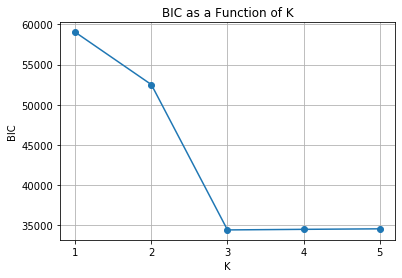

In [10]:
#Run the GMM for K = 1 to 6 and store results in a list
K = np.arange(1,6)
gmms = [GMM(n_components=k).fit(data2D) for k in K]

#Plot the BIC for the GMM model
plt.figure()
x_labels = [1,2,3,4,5]
#Note: Plot code iterates through gmm to get BIC for each K value
plt.plot(K, [gmm.bic(data2D) for gmm in gmms], '-o', label='GMM BIC') 
plt.xticks(x_labels)
plt.title('BIC as a Function of K')
plt.xlabel('K')
plt.ylabel('BIC')
plt.grid('on')

Bayesian Information Criterion (BIC) is a model selection criterion used to compare and select models. This is used to dermine the quality of a model. It is defined as follows: 

$$
\mathrm{BIC} = k\ln(n) - 2\ln(\hat L)
$$

where $n$ is the number of datapoints in the observed data, $k$ is the number of free-parameters to be estimated, and $\hat L$ is the maximum likelihood function for a given model. This likelihood based evaluation peanlizes larger number of free-parameters and datapoints. Lower is better. 

The BIC curve flattens sharply at K=3. This criterion suggests that K=3 is the optimal group size for clutering. This agrees with my intuition looking at the visualized contour plot and boundary plot form above. The K-Means in-sample error suggests K=2 is optimal based on the linear separations of data proximity to cluser centroids. The BIC approximation for GMM is a better estimater of the number of centers for this dataset. 

Implement a script that runs both the K-Means and the Gaussian mixture learning algorithms on data100D.npy for $K = \{3,4,5,6,7,8\}$ and plots the K-Means loss and the BIC as a function of $K$, respectively. 
Include the plots in the markdown cell below, and discuss how many clusters you think are within the dataset and compare the learnt results of K-means and Mixture of Gaussian approach.

Remark: The Gaussian mixture learning may take some time to complete (10-30 mins).


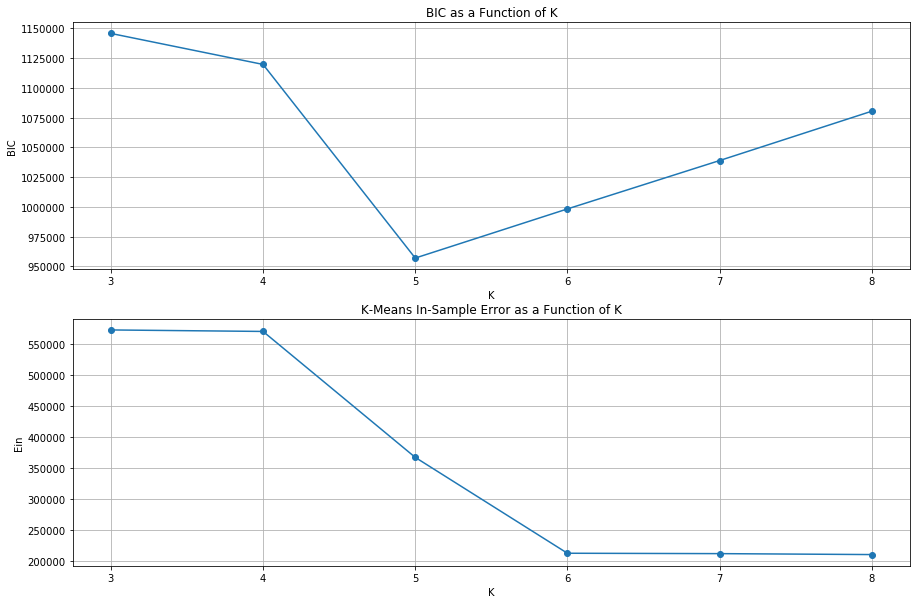

In [11]:
data100D = np.load('data100D.npy')

#Run the GMM and K-Means for K = 3 to 8 and store results in a list
K = np.arange(3,9)
gmms = [GMM(n_components=k).fit(data100D) for k in K]
kmeans = [Kmeans(data100D,k) for k in K]
#Extract Ein from the kmeans results
kmeans = np.array(kmeans)
Ein = kmeans[:,1]

#Plot the BIC for the GMM model
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
#Note: Plot code iterates through gmm to get BIC for each K value
plt.plot(K, [gmm.bic(data100D) for gmm in gmms], '-o', label='GMM')
plt.title('BIC as a Function of K')
plt.xlabel('K')
plt.ylabel('BIC')
plt.grid('on')

plt.subplot(2,1,2)
plt.plot(K, Ein, '-o',label='K-Means')
plt.title('K-Means In-Sample Error as a Function of K')
plt.xlabel('K')
plt.ylabel('Ein')
plt.grid('on')

BIC suggests there are 5 clusters in the dataset, while Ein for K-Means suggests there are 6 clusters. 

The BIC for GMM has proven to be a better estimator for K as the probablistic model doesn't assume line boundaries; the probablistic GMM boundaries are more accurate. 

This dataset most likely has K=5 clusters

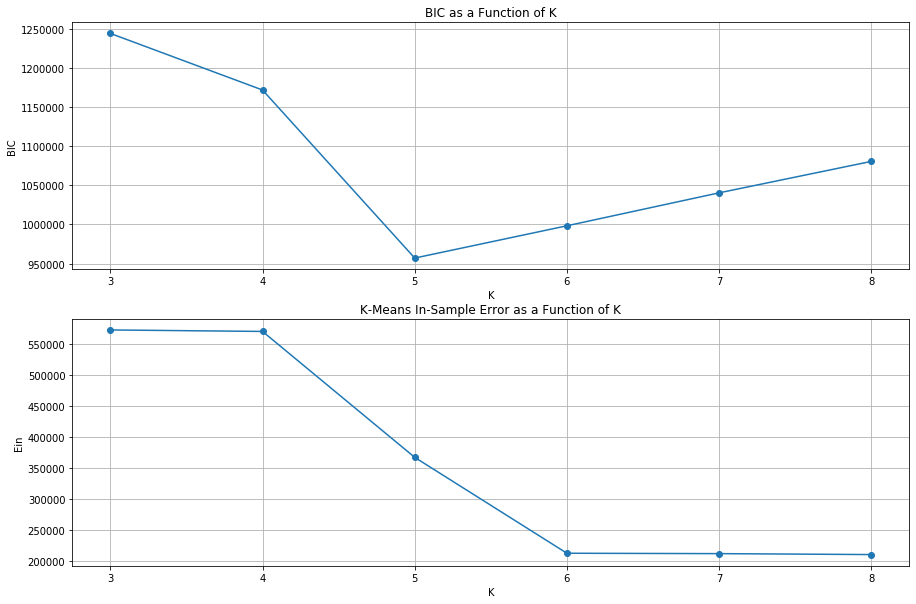